# 20230523 OpenNEM

In [12]:
from google.colab import drive
#import pandas as pd

# Google Drive
drive.mount('/content/drive')

# CSV
#file_path = '/content/drive/My Drive/MA/19981201 OpenNEM.csv'
#data = pd.read_csv(file_path)

#
#data.head()

import pandas as pd

# Load the new dataset
file_path_new = '/content/drive/My Drive/MA/19981201 OpenNEM.csv'  # Update with the correct path
data_new = pd.read_csv(file_path_new)

# Display the first few rows of the new dataframe to understand its structure
print(data_new.head())



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         date  Battery (Charging) -  GWh  Pumps -  GWh  Coal (Brown) -  GWh  \
0  1998-12-01                        0.0        -13.48               3262.0   
1  1999-01-01                        0.0        -21.08               4300.0   
2  1999-02-01                        0.0        -10.82               4128.0   
3  1999-03-01                        0.0        -32.13               4598.0   
4  1999-04-01                        0.0         -9.21               4174.0   

   Coal (Black) -  GWh  Bioenergy (Biogas) -  GWh  Bioenergy (Biomass) -  GWh  \
0               6453.0                        0.0                         0.0   
1               8089.0                        0.0                         0.0   
2               7484.0                        0.0                         0.0   
3               8129.0                        0.0                       

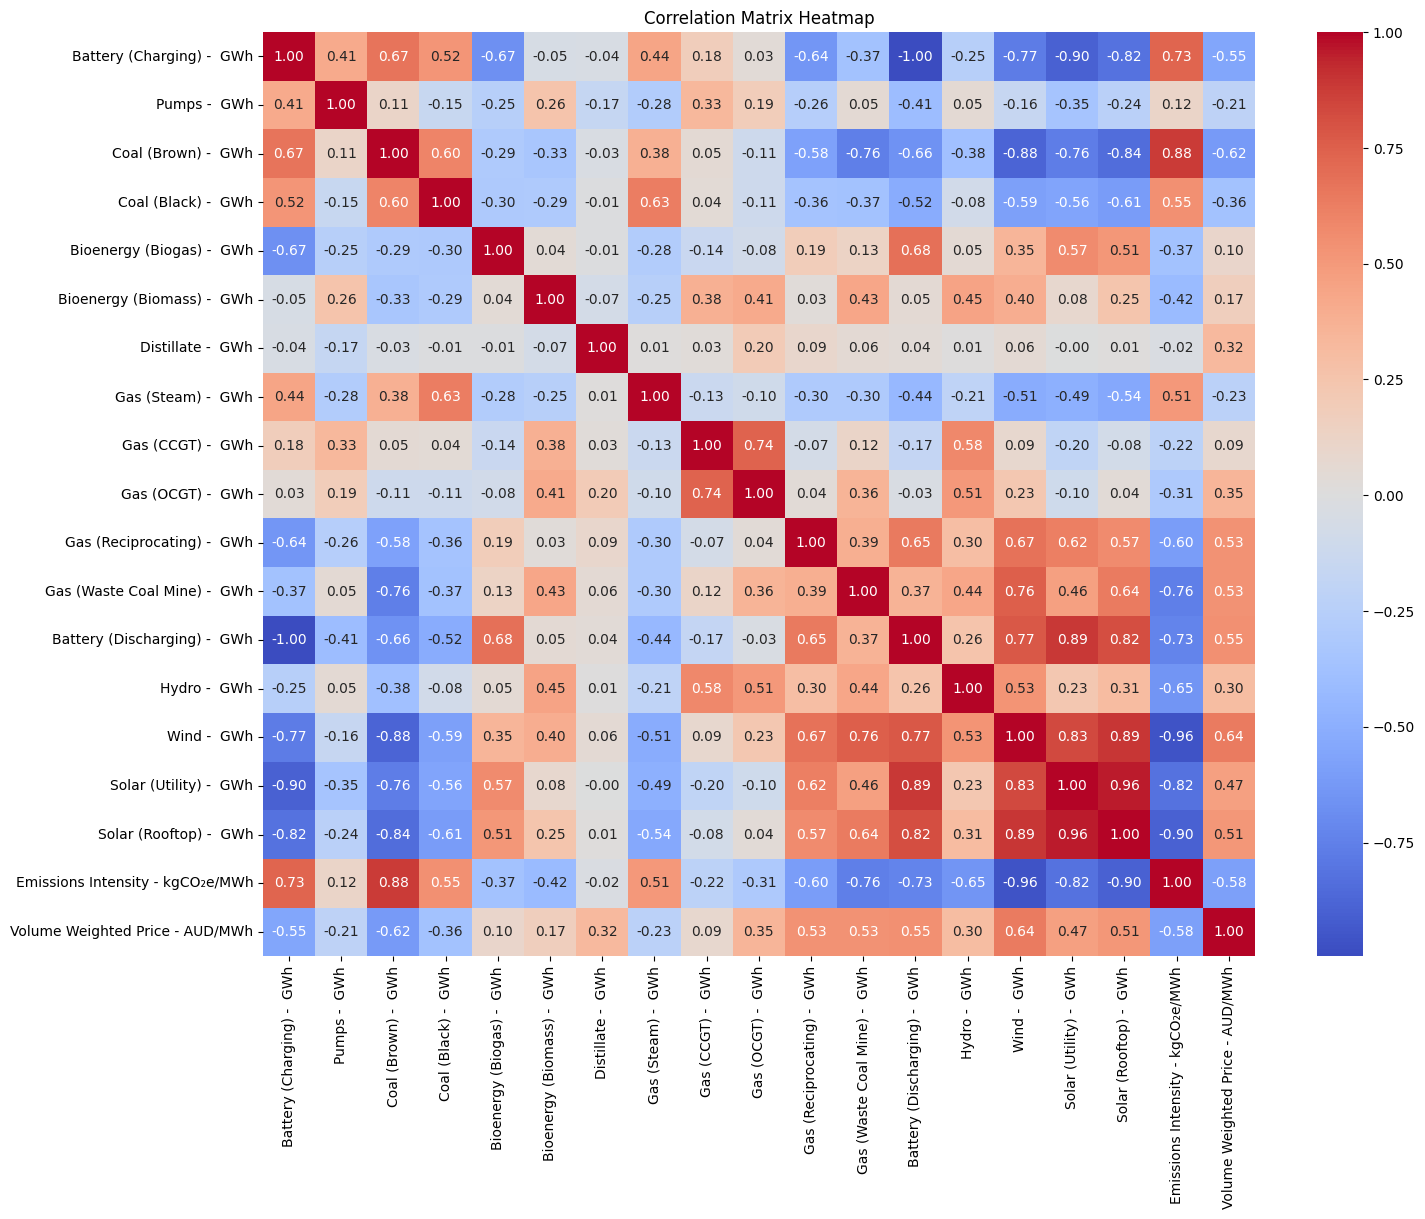

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Select relevant columns for analysis
# columns_of_interest = [
#    'Coal (Brown) Emissions Vol - tCO₂e', 'Coal (Black) Emissions Vol - tCO₂e',
#    'Bioenergy (Biogas) Emissions Vol - tCO₂e', 'Bioenergy (Biomass) Emissions Vol - tCO₂e',
#    'Distillate Emissions Vol - tCO₂e', 'Gas (Steam) Emissions Vol - tCO₂e',
#    'Gas (CCGT) Emissions Vol - tCO₂e', 'Gas (OCGT) Emissions Vol - tCO₂e',
#    'Gas (Reciprocating) Emissions Vol - tCO₂e', 'Gas (Waste Coal Mine) Emissions Vol - tCO₂e',
#    'Emissions Intensity - kgCO₂e/MWh', 'Volume Weighted Price - AUD/MWh'
#]

columns_of_interest = [
    'Battery (Charging) -  GWh', 'Pumps -  GWh', 'Coal (Brown) -  GWh',
    'Coal (Black) -  GWh', 'Bioenergy (Biogas) -  GWh', 'Bioenergy (Biomass) -  GWh',
    'Distillate -  GWh', 'Gas (Steam) -  GWh', 'Gas (CCGT) -  GWh',
    'Gas (OCGT) -  GWh', 'Gas (Reciprocating) -  GWh', 'Gas (Waste Coal Mine) -  GWh',
    'Battery (Discharging) -  GWh', 'Hydro -  GWh', 'Wind -  GWh',
    'Solar (Utility) -  GWh', 'Solar (Rooftop) -  GWh', 'Emissions Intensity - kgCO₂e/MWh',
    'Volume Weighted Price - AUD/MWh'
]

# Filter data to include only these columns
filtered_data_new = data_new[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix_new = filtered_data_new.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix_new, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


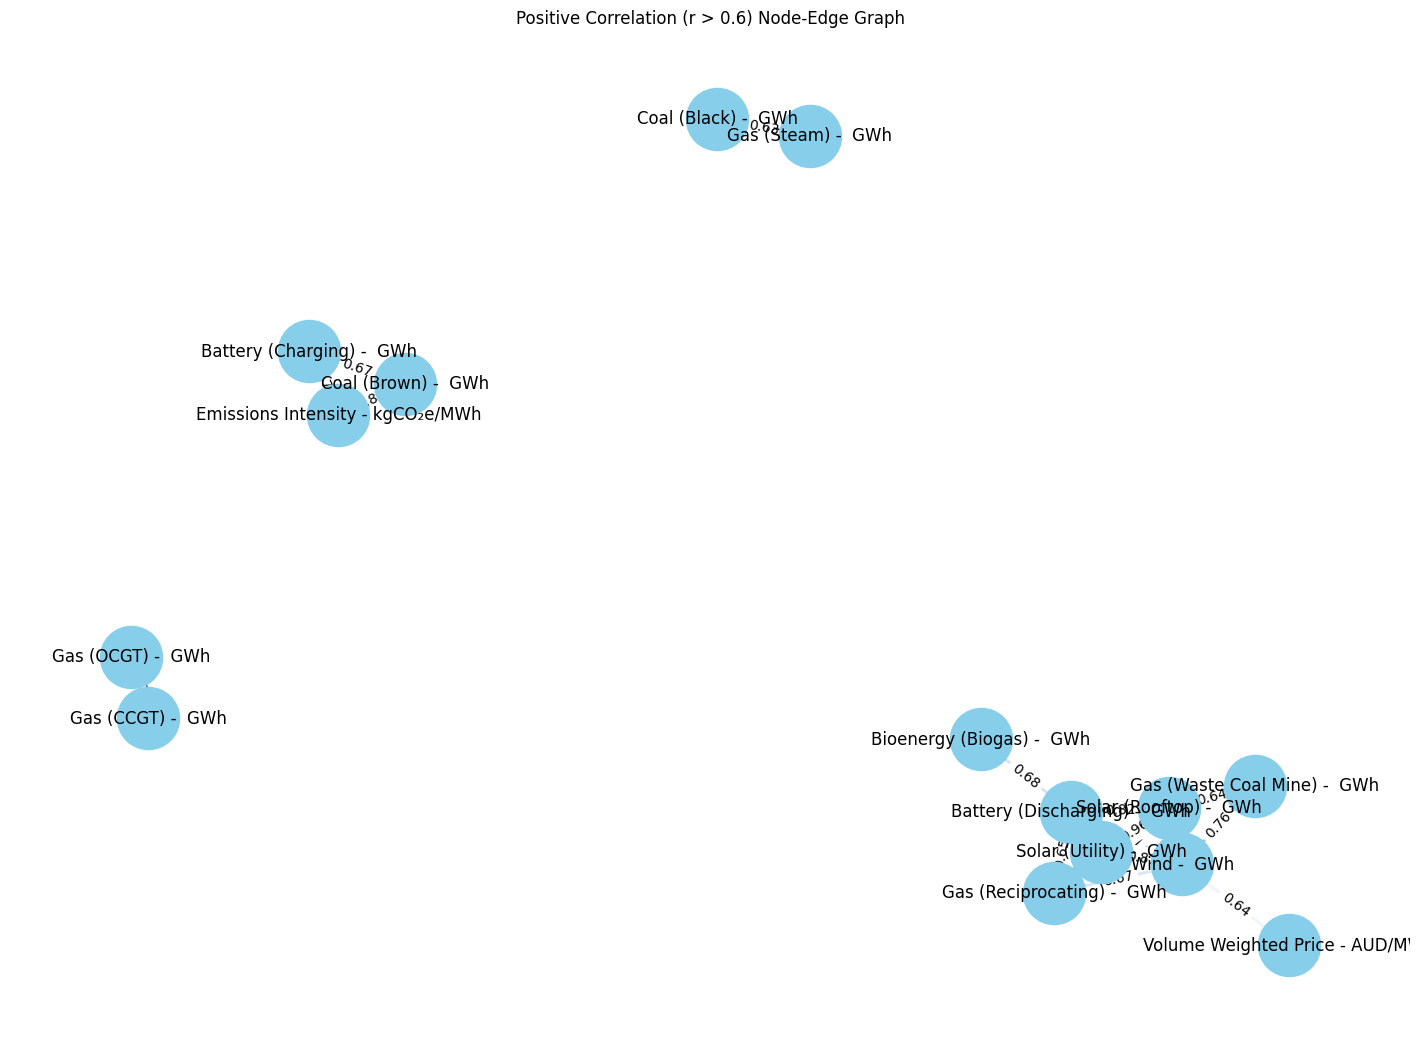

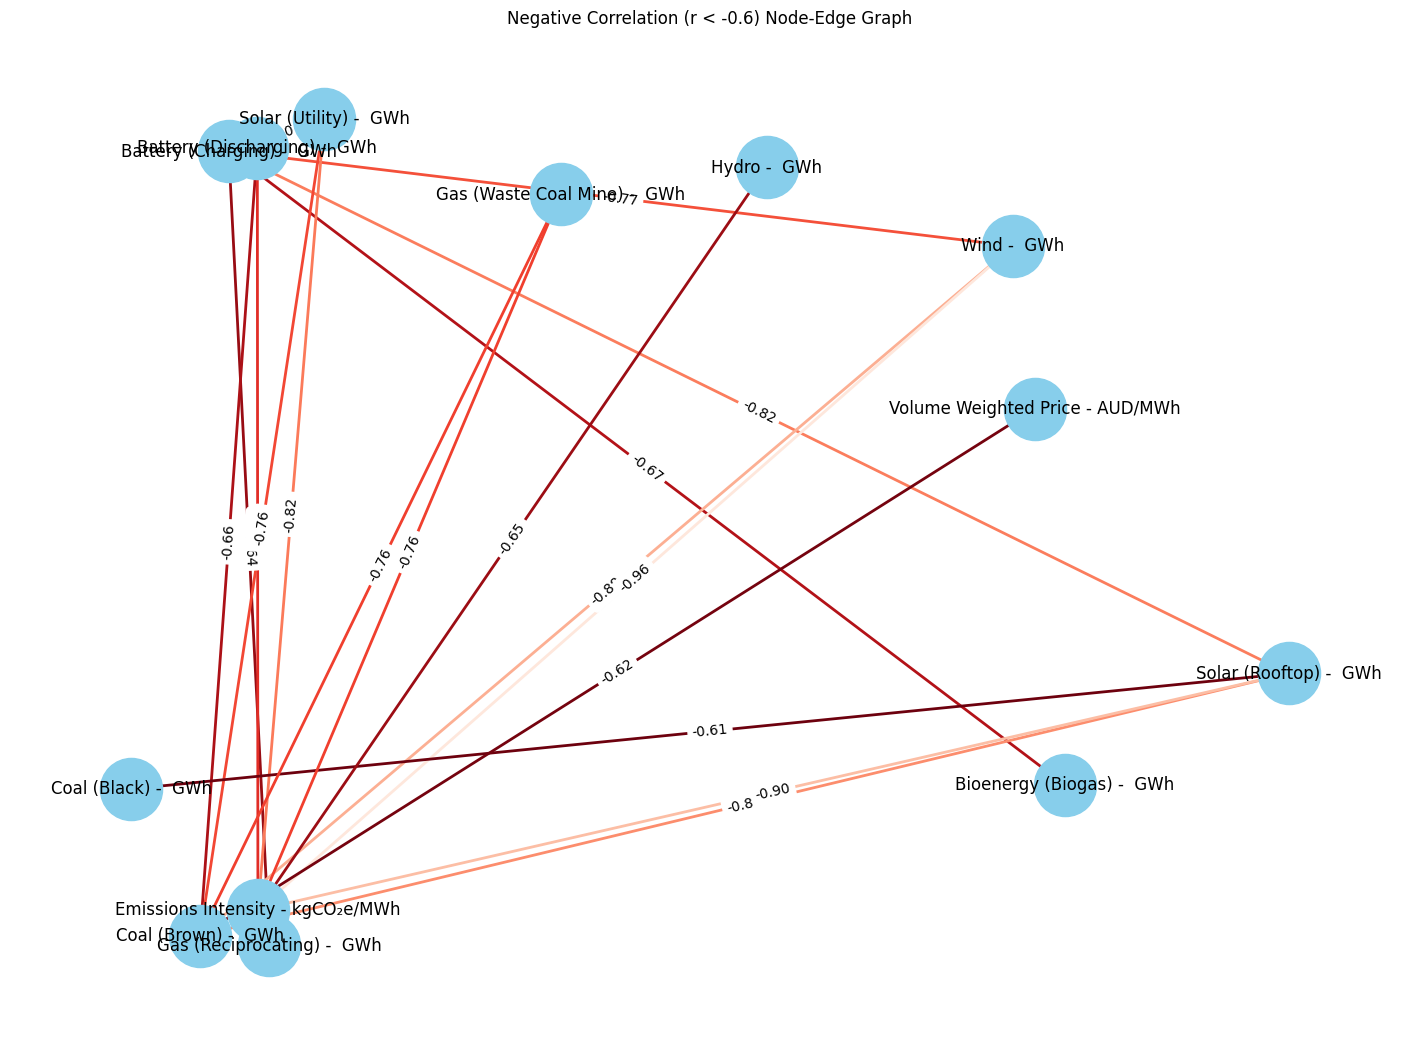

In [14]:
# Function to create and plot node-edge graph with edge labels
def plot_node_edge_graph(corr_matrix, threshold, greater_than=True, title=""):
    if greater_than:
        mask = corr_matrix >= threshold
    else:
        mask = corr_matrix <= threshold

    edges = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iat[i, j]) for i in range(len(corr_matrix.index))
             for j in range(i+1, len(corr_matrix.columns)) if mask.iat[i, j]]

    graph = nx.Graph()
    for edge in edges:
        graph.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.spring_layout(graph, seed=42, k=0.3)  # Adjust the 'k' parameter to spread out nodes

    plt.figure(figsize=(14, 10))
    if len(graph.edges) > 0:
        edges, weights = zip(*nx.get_edge_attributes(graph, 'weight').items())
        nx.draw(graph, pos, node_color='skyblue', node_size=2000, with_labels=True, edge_color=weights, edge_cmap=plt.cm.Blues if greater_than else plt.cm.Reds, width=2)
        edge_labels = {(edge[0], edge[1]): f'{edge[2]["weight"]:.2f}' for edge in graph.edges(data=True)}
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black')
    else:
        plt.text(0.5, 0.5, 'No strong correlations found', horizontalalignment='center', verticalalignment='center')
    plt.title(title)
    plt.show()

# Plot the positive correlation graph with edge labels (r > 0.6)
plot_node_edge_graph(correlation_matrix_new, 0.6, greater_than=True, title='Positive Correlation (r > 0.6) Node-Edge Graph')

# Plot the negative correlation graph with edge labels (r < -0.6)
plot_node_edge_graph(correlation_matrix_new, -0.6, greater_than=False, title='Negative Correlation (r < -0.6) Node-Edge Graph')


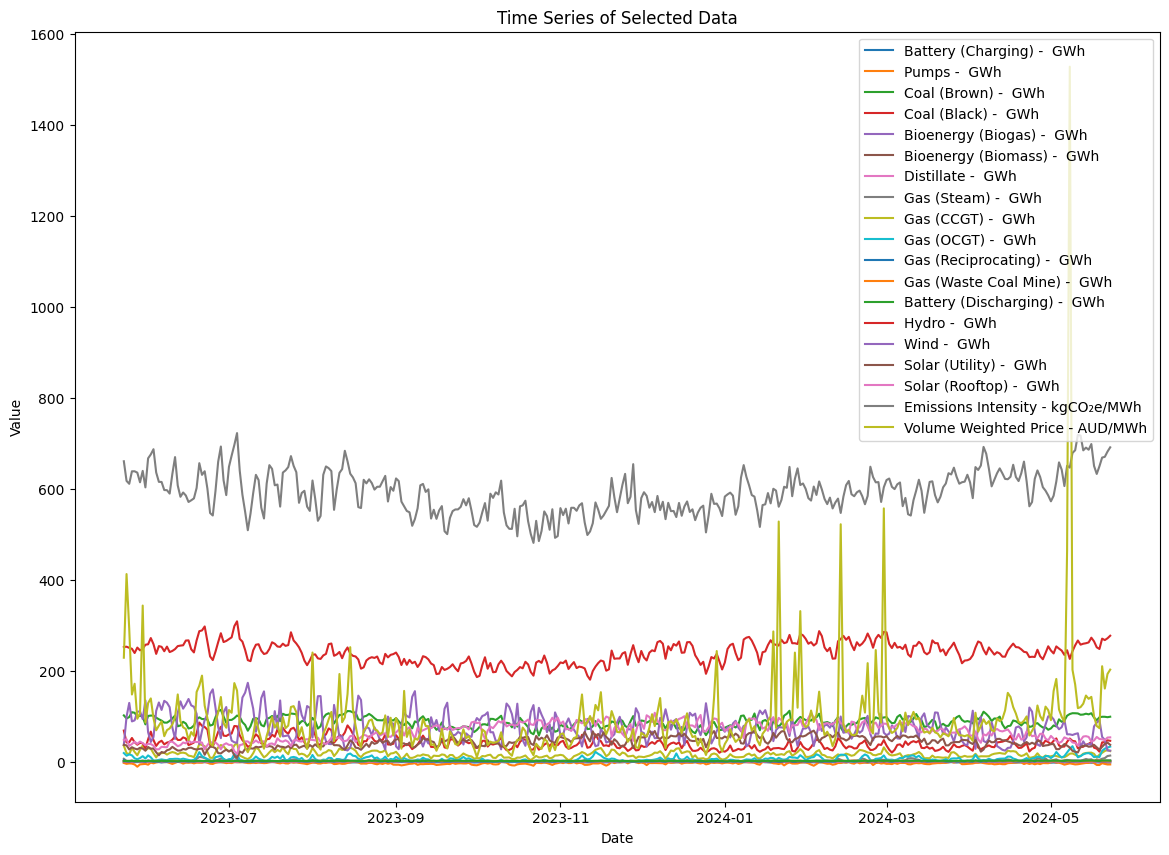

In [10]:
# Convert the 'date' column to datetime
data_new['date'] = pd.to_datetime(data_new['date'])

# Plot time series for selected columns
plt.figure(figsize=(14, 10))
for column in columns_of_interest:
    plt.plot(data_new['date'], data_new[column], label=column)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of Selected Data')
plt.legend(loc='upper right')
plt.show()


# 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Select relevant columns for analysis
columns_of_interest = [
    'Battery (Charging) -  GWh', 'Pumps -  GWh', 'Coal (Brown) -  GWh',
    'Coal (Black) -  GWh', 'Bioenergy (Biogas) -  GWh', 'Bioenergy (Biomass) -  GWh',
    'Distillate -  GWh', 'Gas (Steam) -  GWh', 'Gas (CCGT) -  GWh',
    'Gas (OCGT) -  GWh', 'Gas (Reciprocating) -  GWh', 'Gas (Waste Coal Mine) -  GWh',
    'Battery (Discharging) -  GWh', 'Hydro -  GWh', 'Wind -  GWh',
    'Solar (Utility) -  GWh', 'Solar (Rooftop) -  GWh', 'Emissions Intensity - kgCO₂e/MWh',
    'Volume Weighted Price - AUD/MWh'
]

# Filter data to include only these columns
filtered_data = data[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Function to create and plot node-edge graph with edge labels
def plot_node_edge_graph(corr_matrix, threshold, greater_than=True, title=""):
    if greater_than:
        mask = corr_matrix >= threshold
    else:
        mask = corr_matrix <= threshold

    edges = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iat[i, j]) for i in range(len(corr_matrix.index))
             for j in range(i+1, len(corr_matrix.columns)) if mask.iat[i, j]]

    graph = nx.Graph()
    for edge in edges:
        graph.add_edge(edge[0], edge[1], weight=edge[2])

    pos = nx.spring_layout(graph, seed=42, k=0.3)  # Adjust the 'k' parameter to spread out nodes

    plt.figure(figsize=(14, 10))
    if len(graph.edges) > 0:
        edges, weights = zip(*nx.get_edge_attributes(graph, 'weight').items())
        nx.draw(graph, pos, node_color='skyblue', node_size=2000, with_labels=True, edge_color=weights, edge_cmap=plt.cm.Blues if greater_than else plt.cm.Reds, width=2)
        edge_labels = {(edge[0], edge[1]): f'{edge[2]["weight"]:.2f}' for edge in graph.edges(data=True)}
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_color='black')
    else:
        plt.text(0.5, 0.5, 'No strong correlations found', horizontalalignment='center', verticalalignment='center')
    plt.title(title)
    plt.show()

# Plot the positive correlation graph with edge labels (r > 0.6)
plot_node_edge_graph(correlation_matrix, 0.6, greater_than=True, title='Positive Correlation (r > 0.6) Node-Edge Graph')

# Plot the negative correlation graph with edge labels (r < -0.6)
plot_node_edge_graph(correlation_matrix, -0.6, greater_than=False, title='Negative Correlation (r < -0.6) Node-Edge Graph')